# Eşikleme (Thresholding)

OpenCV Thresholding (Eşikleme)

Giriş olarak verilen görüntüyü ikili görüntüye çevirmek için kullanılan bir yöntemdir. İkili görüntü (binary), görüntünün siyah ve beyaz olarak tanımlanmasıdır. Morfolojik operatörler gibi görüntü üzerindeki gürültüleri azaltmak veya nesne belirlemek gibi farklı amaçlar için kullanılır. Giriş olarak verilen görüntü üzerinde uygulanan thresholding tipine bağlı olarak, pikselleri verilen eşik değerine göre siyah ya da beyaz olarak günceller.

OpenCV içerisindeki sık kullanılan threshold tipleri:

THRESH_BINARY
THRESH_BINARY_INV
THRESH_TRUNC
THRESH_TOZERO
THRESH_TOZERO_INV


Eşikleme (Thresholding) bir resme ait piksellerin değerlerini belirli bir eşik değerini
geçmesine/geçmemesine bağlı olarak değerini düzenleyen bir fonksiyondur.

Diğer bir tanımlama ile resmin piksel değerleri (veya piksel yoğunluğu)
belirli bir miktarın üzerinde/altında olması durumuna göre piksel değerlerine işlemler yapan bir fonksiyondur.

Resimler eşikleme (threshold) yapılmadan önce gray formata çevrilmelidir çünkü
threshold işlemi tek bir piksel değerini kontrol ettiği için tek başına veya ek
kodlar/fonksiyonlar kullanılmadan çok kanallı bir resimde yani renkli resimde uygulanması mümkün değildir.

Böyle bir durumda RGB kanalları ayrı ayrı işlenerek sonradan birleştirilebilir.

1-Çok büyük aralıklı değerleri olan pikselleri düzenlemek
2- Piksel değerlerine göre filtreleme yapmak
3-Resimlerde arka plan gürültülerini azaltma
4-Bazı nesneleri ön plana çıkarma
5-Resmi segmentlere ayırma

# Kütüphaneleri Yükleme

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Eşikleme Türleri

In [16]:
img = cv2.imread('Data/Gradient.png')

cv2.imshow("Original", img)
cv2.waitKey(0)

-1

In [17]:
img = cv2.imread('Data/Gradient.png',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

cv2.imshow("thresh1",thresh1)
cv2.imshow("thresh2 ", thresh2)
cv2.imshow("thresh3",thresh3)
cv2.imshow("thresh4 ", thresh4)
cv2.imshow("thresh5 ", thresh5)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Örnek yapalım

In [18]:
image = cv2.imread('Data/Bugs_Bunny.jpg')

cv2.imshow("Original", image)
cv2.waitKey(0)

-1

In [19]:
image = cv2.imread('Data/Bugs_Bunny.jpg',0)

ret,thresh1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(image,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)

cv2.imshow("thresh1", thresh1)
cv2.imshow("thresh2", thresh2)
cv2.imshow("thresh3", thresh3)
cv2.imshow("thresh4", thresh4)
cv2.imshow("thresh5", thresh5)
cv2.waitKey(0)

-1

In [20]:
img = cv2.imread('Data/Ataturk.jpg')
cv2.imshow("Original", img)
cv2.waitKey(0)

-1

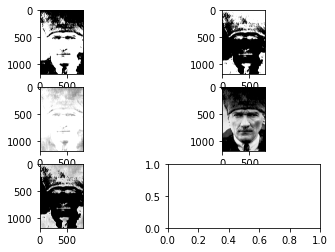

-1

In [21]:
img = cv2.imread('Data/Ataturk.jpg',0)

ret,thresh1 = cv2.threshold(img,50,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,50,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,50,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,50,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,50,255,cv2.THRESH_TOZERO_INV)
fig,ax = plt.subplots(3,2)
ax[0,0].imshow(thresh1, cmap='gray')
ax[0,1].imshow(thresh2, cmap='gray')
ax[1,0].imshow(thresh3, cmap='gray')
ax[1,1].imshow(thresh4, cmap='gray')
ax[2,0].imshow(thresh5, cmap='gray')
plt.show()
cv2.waitKey(0)

## Eşikleme (Adaptive Thresholding )

In [22]:
img = cv2.imread('Data/tweety.png')
cv2.imshow("Original", img)
cv2.waitKey(0)

-1

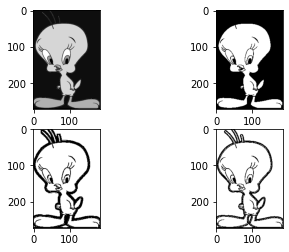

In [23]:
img = cv2.imread('Data/tweety.png',0)

ret, thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                           cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                           cv2.THRESH_BINARY,11,2)

fig,ax = plt.subplots(2,2)
ax[0,0].imshow(img,cmap='gray')
ax[0,1].imshow(thresh1,cmap='gray')
ax[1,0].imshow(th2,cmap='gray')
ax[1,1].imshow(th3,cmap='gray')
plt.show()

## Otsu Eşikleme 

### Normalde bir gri görüntüyü ikili biçime çevirirken bir eşik değeri belirlenir ve bu eşik değerin üzerindeki renkler beyaza, altındaki renkler siyaha dönüştürülür. Ancak tüm görüntüler aynı niteliklere sahip değildir. Sabit bir eşik değeri tüm görüntüler üzerinde kabul edilebilir sonuçlar üretemeyebilir. Dolayısıyla eşik değerin, resmin renk dağılımına uygun olarak belirlenmesini sağlayacak bir yönteme ihtiyaç duyulur. Otsu metodu, gri seviye görüntüler üzerinde uygulanabilen bir eşik tespit yöntemidir. Bu metod kullanılırken görüntünün arka plan ve ön plan olmak üzere iki renk sınıfından oluştuğu varsayımı yapılır. Daha sonra tüm eşik değerleri için bu iki renk sınıfının sınıf içi varyans değeri hesaplanır. Sözcük, metodu geliştiren Nobuyuki Otsu'nun soyadından geliyor.

In [24]:
img = cv2.imread('Data/Scoobydoo.jpeg')
cv2.imshow("Original", img)
cv2.waitKey(0)

-1

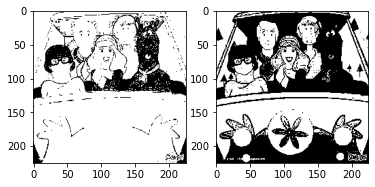

In [25]:
img = cv2.imread('Data/Scoobydoo.jpeg',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_OTSU)
fig,ax = plt.subplots(1,2)
ax[0].imshow(thresh1, cmap='gray')
ax[1].imshow(thresh2, cmap='gray')
plt.show()

# Bulanıklaştırma

### Görüntü işlemede bulanıklaştırma, bir görüntünün netliğini azaltarak veya görüntüdeki gürültüyü azaltarak görüntünün daha yumuşak veya bulanık bir görünüm kazanmasını sağlayan bir işlemdir. Bu, görüntünün keskinlik ve ayrıntılarının azalmasına neden olur.

Bulanıklaştırma, özellikle görüntüdeki gürültüyü azaltmak veya aşırı netlikten kaynaklanan parazitleri kaldırmak gibi birçok farklı amaç için kullanılır. 

Örneğin, yüksek çözünürlüklü bir fotoğraftaki küçük çizgiler veya ayrıntılar, birkaç katmanlı bir bulanıklaştırma işlemiyle azaltılabilir. Bu, görüntüye daha pürüzsüz bir görünüm kazandırır ve sadece ana nesnelerin ortaya çıkmasını sağlar.

blur() 
 medianblur()
 gaussianBlur()


In [26]:
img = cv2.imread('Data/JackSparrow.jpeg')
cv2.imshow("Original", img)
cv2.waitKey(0)

-1

In [27]:
img = cv2.imread('Data/JackSparrow.jpeg')
sonuc_1 = cv2.blur(img,(4,4))
sonuc_2 = cv2.blur(img,(8,8))
sonuc_3 = cv2.blur(img,(16,16))
cv2.imshow("orjinal resim",img)
cv2.imshow("sonuc (4x4)",sonuc_1)
cv2.imshow("sonuc (8x8)",sonuc_2)
cv2.imshow("sonuc (16x16)",sonuc_3)
cv2.waitKey(0)

-1

In [28]:
img = cv2.imread('Data/JamesFranco.jpg')
cv2.imshow("Original", img)
cv2.waitKey(0)

-1

In [29]:
img = cv2.imread('Data/JamesFranco.jpg')
sonuc_1 = cv2.blur(img,(4,4))
sonuc_2 = cv2.blur(img,(8,8))
sonuc_3 = cv2.blur(img,(16,16))
cv2.imshow("orjinal resim",img)
cv2.imshow("sonuc (4x4)",sonuc_1)
cv2.imshow("sonuc (8x8)",sonuc_2)
cv2.imshow("sonuc (16x16)",sonuc_3)
cv2.waitKey(0)

-1

In [30]:
img = cv2.imread('Data/DwayneJohnson.jpg')
cv2.imshow("Original", img)
cv2.waitKey(0)

-1

In [31]:
img = cv2.imread('Data/DwayneJohnson.jpg')
sonuc_1 = cv2.blur(img,(4,4))
sonuc_2 = cv2.blur(img,(8,8))
sonuc_3 = cv2.blur(img,(16,16))
cv2.imshow("orjinal resim",img)
cv2.imshow("sonuc (4x4)",sonuc_1)
cv2.imshow("sonuc (8x8)",sonuc_2)
cv2.imshow("sonuc (16x16)",sonuc_3)
cv2.waitKey(0)

-1

### <b>Bulanıklaştırma - MedianBlur() </b>
Parametre almış boyut kadar alanda tarama yapar ve buradaki pikselleri sıralayarak ortanca değerini bularak ortanca değeri piksel ile değiştirir.
Parametre olarak verilen kernel büyüklüğü tek sayı olmalıdır.

In [32]:
img = cv2.imread('Data/JamesFranco.jpg')
sonuc_1 = cv2.medianBlur(img,(3))
sonuc_2 = cv2.medianBlur(img,(5))
sonuc_3 = cv2.medianBlur(img,(11))
cv2.imshow("orjinal resim",img)
cv2.imshow("sonuc (3)",sonuc_1)
cv2.imshow("sonuc (5)",sonuc_2)
cv2.imshow("sonuc (11)",sonuc_3)

cv2.waitKey(0)

-1

### <b>Bulanıklaştırma - GaussianBlur() </b>

In [33]:
img = cv2.imread('Data/JamesFranco.jpg')
sonuc_1 = cv2.GaussianBlur(img,(3,3),sigmaX=150)
sonuc_2 = cv2.GaussianBlur(img,(5,5),sigmaX=150)
sonuc_3 = cv2.GaussianBlur(img,(11,11),sigmaX=150)
cv2.imshow("orjinal resim",img)
cv2.imshow("sonuc (3)",sonuc_1)
cv2.imshow("sonuc (5)",sonuc_2)
cv2.imshow("sonuc (11)",sonuc_3)

cv2.waitKey(0)

-1